In [1]:
import torch

In [2]:
# from SC_IPFP.sde_solvers_time import solve_sde_RK
from SC_IPFP.torch.utils import log_kde_pdf_per_point, silvermans_rule


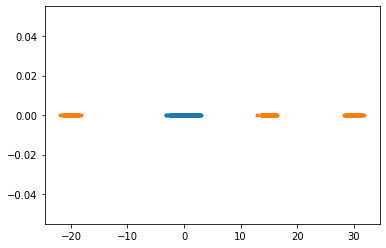

In [3]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 900
n_2 = int(n * 1.0 / 3)

X1 = npr.randn(n).reshape(-1,1) - 0
X21 = 0.6 * npr.randn(n_2).reshape(-1,1) + 30
X22 =  0.6 * npr.randn(n_2).reshape(-1,1) -20
X23 =  0.6 * npr.randn(n_2).reshape(-1,1) + 15

X2 = np.concatenate((X21, X22, X23), axis=0)
# X1, X2 = X2, X1

plt.plot(X2.flatten(), [0] * n, '.')
plt.plot(X1.flatten(), [0] * n, '.')


In [20]:
X1 = torch.tensor(X1)
X2 = torch.tensor(X2)

torch.Size([1, 1])


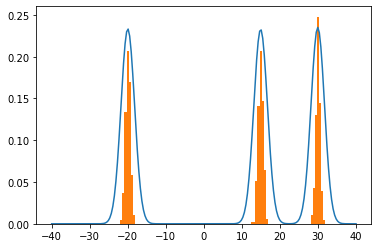

In [19]:
x = torch.linspace(-40, 40 , 200).reshape(-1,1).double()
H = silvermans_rule(X2)
print(H.shape)
kde  = torch.exp(log_kde_pdf_per_point(x, X2, H))
plt.plot(x.detach().cpu().numpy().flatten(), kde.detach().cpu().numpy().flatten())
plt.hist(X2.flatten(), bins=100, density=True);